*30 Sep 2024 : 21BAI1133 - Mukundh J*
#  Speech and Natural Language Processing Lab 10
Time-Domain Analysis -- Visualizing and Understanding Phonemes
- Record a few samples of your voice in 16kHz.
- Segment and show at least 15 unique phones in the time domain.
  + Use wavesurfer to find the start and end time of a phone in seconds.
  + Find the sample number, based on the time and sampling rate.
  + sample number = time in s * sampling rate.
- You must decide on what phonemes you are going to show, form words based on those phonemes, and then record these words.
- Title the plots with the corresponding phone.
- Discuss about how voiced sounds and unvoiced sounds look like in their time-domain plots.
- Find the pitch period for your voice (in seconds).
  + Duration between two valleys or two peaks of a voiced sound.
- Submit your recorded files and your ipynb notebooks.
  + DO NOT ZIP. Upload as multiple files. Else you will be asked to resubmit.

- You can use librosa to read wav files.
  + Use the correct sampling rate.
  + Make sure you record in mono, and not stereo. Else you have to deal with it later.  
- You can use this recorder: https://play.google.com/store/apps/details?id=com.andrwq.recorder
- Wavesurfer: https://sourceforge.net/projects/wavesurfer/

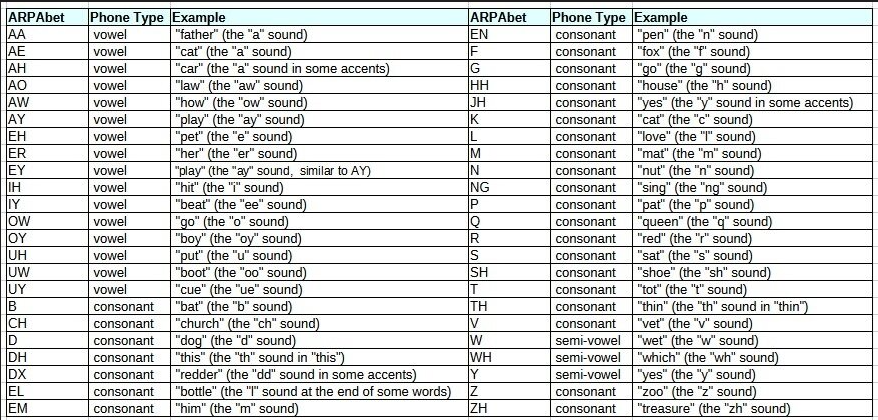

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/recording1.wav /content/

In [3]:
sampling_rate = 16000

In [4]:
d = {}

In [5]:
def add_to_dict(d,name, t):
  t1,t2=t
  d[f"{name}"]=(t1*sampling_rate,t2*sampling_rate) #(sample_number_first , sample_number_last)

In [6]:
add_to_dict(d,"do",(1.46,1.50))
add_to_dict(d,"re",(2.68,2.72))
add_to_dict(d,"mi",(4,4.04))
add_to_dict(d,"fa",(5.42,5.46))
add_to_dict(d,"sol",(6.58,6.64))
add_to_dict(d,"la",(7.80,7.84))
add_to_dict(d,"ti",(9.14,9.20))

In [7]:
d

{'do': (23360.0, 24000.0),
 're': (42880.0, 43520.0),
 'mi': (64000, 64640.0),
 'fa': (86720.0, 87360.0),
 'sol': (105280.0, 106240.0),
 'la': (124800.0, 125440.0),
 'ti': (146240.0, 147200.0)}

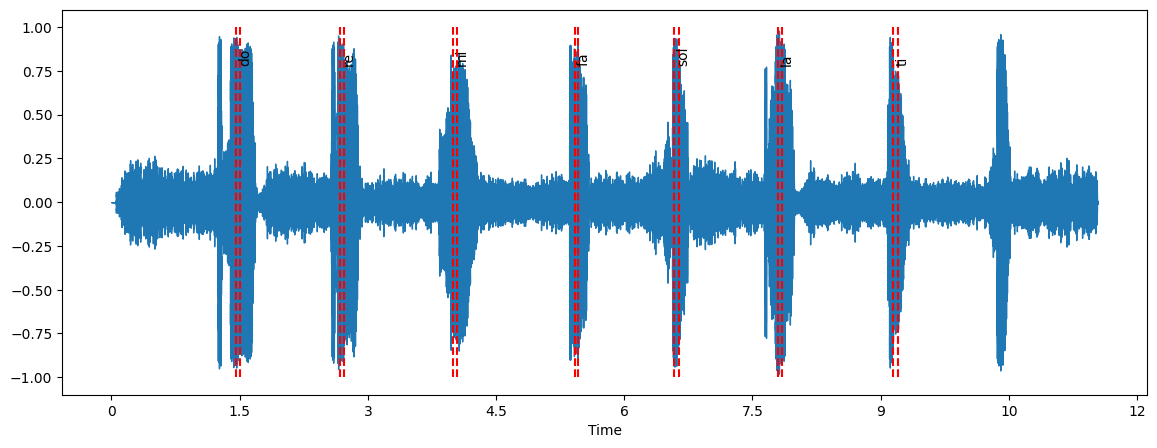

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load('/content/recording1.wav', sr=sampling_rate)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

for key, value in d.items():
  start, end = value
  plt.vlines(x=start / sr, ymin=-1, ymax=1, color="r", linestyle="--")
  plt.vlines(x=end / sr, ymin=-1, ymax=1, color="r", linestyle="--")
  plt.text((start + end) / (2 * sr), 0.8, key, rotation=90)

plt.show()


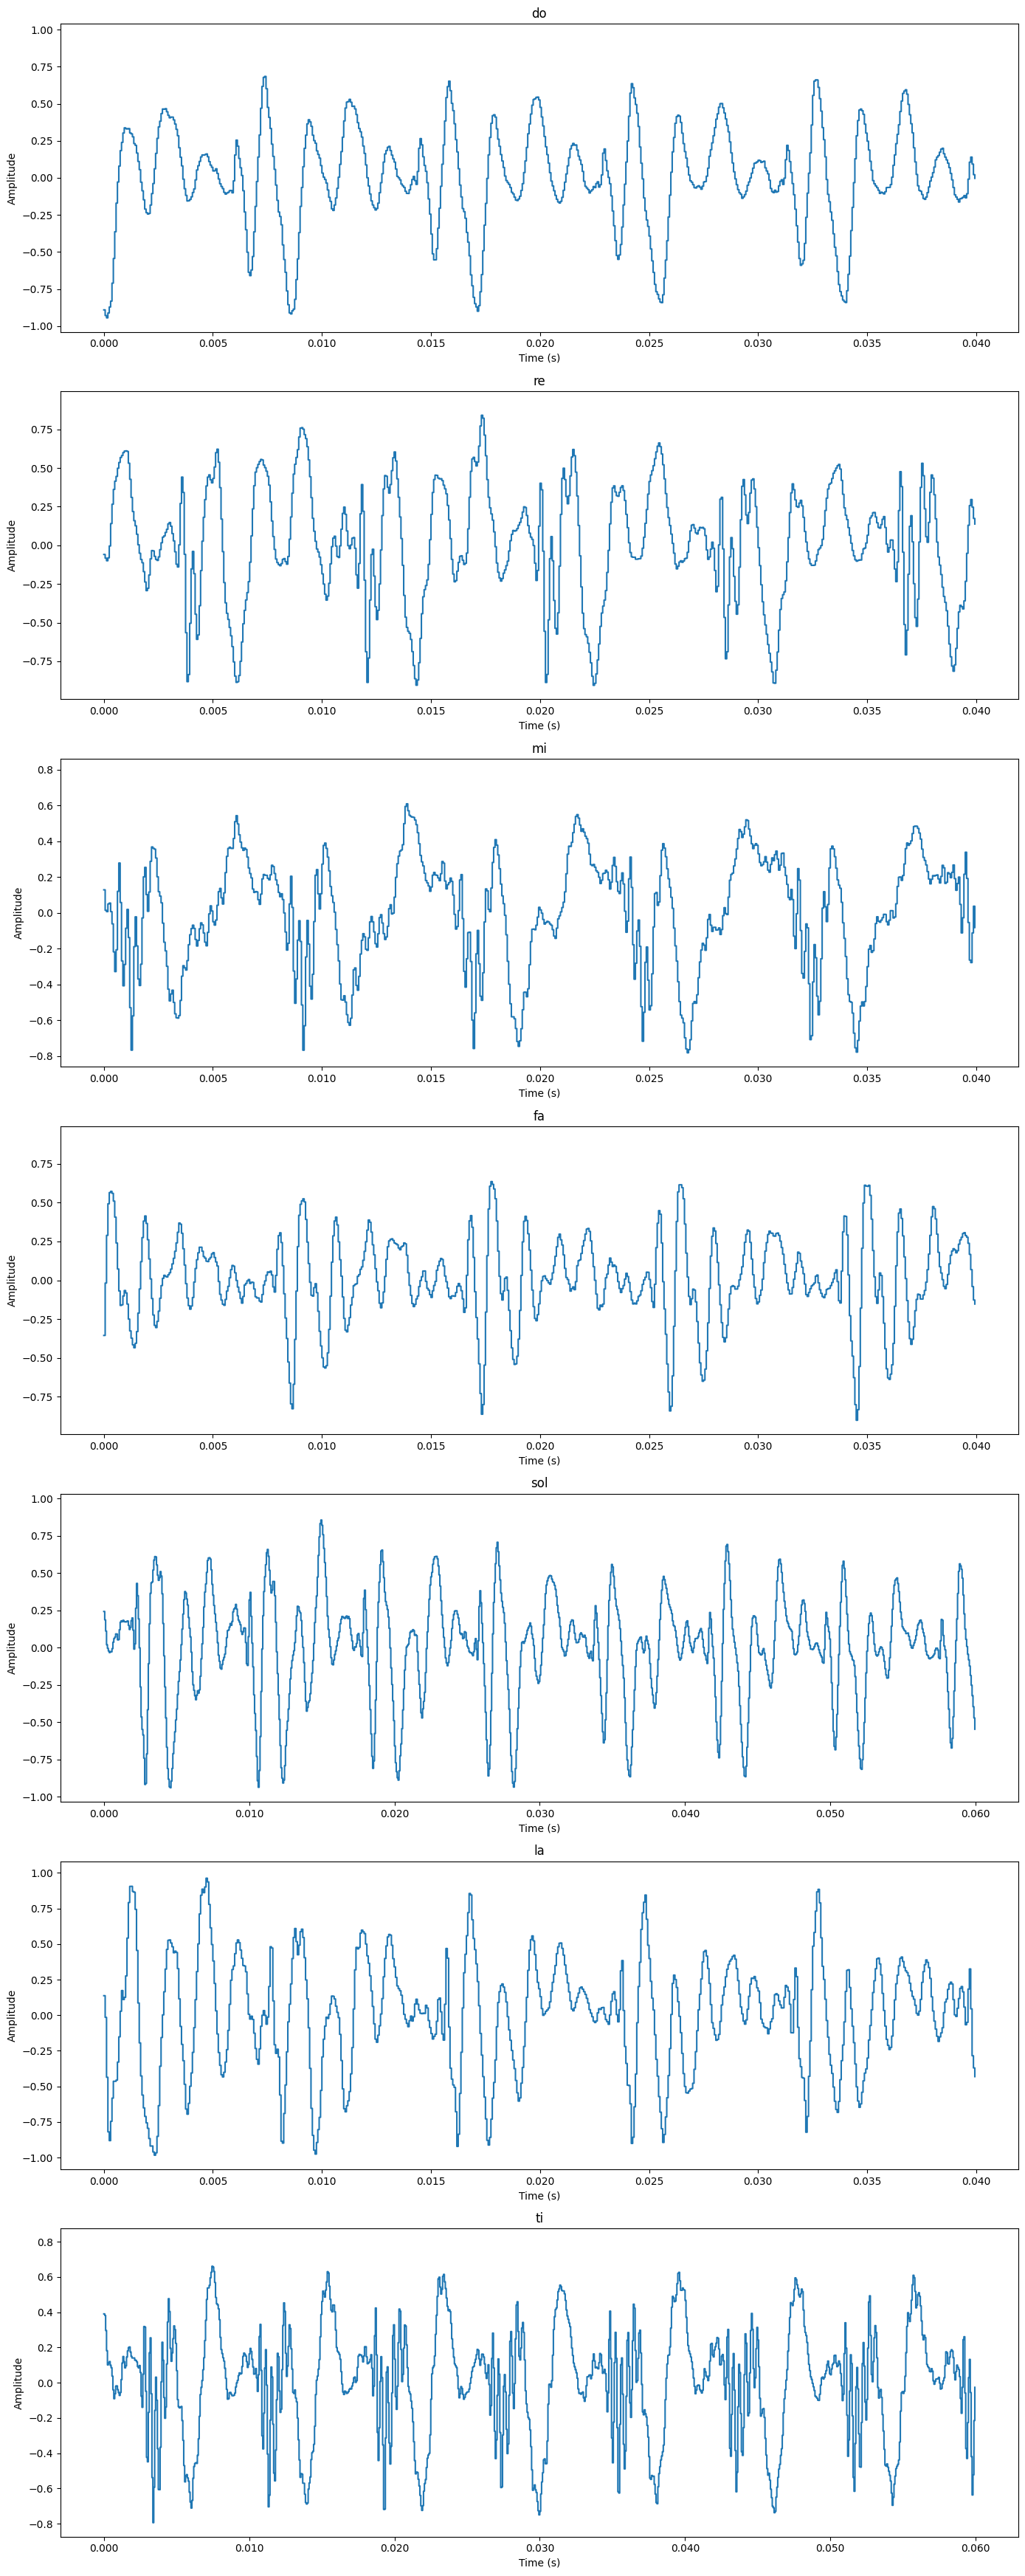

In [9]:
y, sr = librosa.load('/content/recording1.wav', sr=sampling_rate)

# Create subplots for each region
num_regions = len(d)
fig, axes = plt.subplots(num_regions, 1, figsize=(14, 5 * num_regions))

for i, (key, value) in enumerate(d.items()):
  start, end = value
  region_y = y[int(start):int(end)]
  librosa.display.waveshow(region_y, sr=sr, ax=axes[i])
  axes[i].set_title(key)
  axes[i].set_xlabel("Time (s)")
  axes[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()
